<a href="https://colab.research.google.com/github/natalia2000-jpg/Machine-learning/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Εργασία 8-Artificial Neural Networks

Όνομα:Ναταλία Ταμβακίδου ΑΕΜ:200


In [26]:
!unzip archive.zip

Archive:  archive.zip
replace dataset/Beagle/Beagle_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [27]:
import os
import PIL
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import tensorflow as tf
from sklearn.model_selection import train_test_split

#Ερώτηση 3

In [28]:
img_size=64
x,y=[],[]
class_names=sorted(os.listdir('dataset'))
class_ids={label:i for i,label in enumerate(class_names)}

In [29]:
from PIL import Image

In [30]:
for i in class_names:
  folder=os.path.join('dataset',i)
  for file in os.listdir(folder):
    img_path=os.path.join(folder,file)
    try:
      img=Image.open(img_path).convert('RGB')
      img=img.resize((img_size,img_size))
      x.append(np.array(img))
      y.append(class_ids[i])
    except:
      pass

x=np.array(x,dtype='float32')
y=np.array(y,dtype='int32')
print(x.shape,y.shape)

(967, 64, 64, 3) (967,)


<BarContainer object of 10 artists>

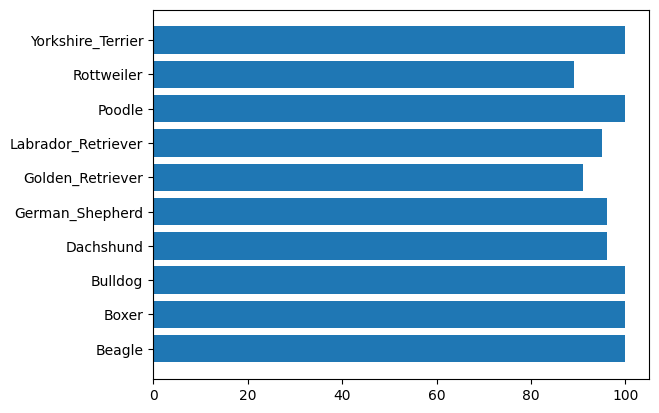

In [31]:
y_counts = np.unique(y,return_counts=True)
plt.barh(class_names,y_counts[1])

#Ερώτηση 4 και 5

In [32]:
seed = 0

tf.random.set_seed(seed=seed)
np.random.seed(seed=seed)
random.seed(seed)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=seed,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((676, 64, 64, 3), (291, 64, 64, 3), (676,), (291,))

#Προεπεξεργσία των Δεδομένων

In [34]:
#Κανονικοποήση των inputs στο [0,0.1] διαιρώντας με το 255
#Δημιουργία One-Hot encoding targets για να μπορουν να χρησιμοποιηθούν στο Softnax Activation Function στο τελικό επίπεδο
x_train=x_train/255.0
x_test=x_test/255.0
# Convert y_train and y_test to one-hot encoding directly using the integer labels
y_train=np.eye(len(class_names))[y_train]
y_test=np.eye(len(class_names))[y_test]
y_train.shape,y_test.shape

((676, 10), (291, 10))

#Multi-Layer Perceptron

In [35]:
input_size = x_train.shape[1:]
output_size = len(class_names)

mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='MLP')
mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,590,794 (6.07 MB)

 Trainable params: 1,590,794 (6.07 MB)

 Non-trainable params: 0 (0.00 B)

Σχόλιο: Το συγκεκριμένο MLP αποτελείται απο 5 επίπεδα:

1.   Επίπεδο Εισόδου
2.   Επίπεδο Flatten,όπου μετατρέπει τα πολυδιάστατα δεδομένα σε μονοδιάστατο διάνυσμα στοιχείων,χωρίς να αλλάζει τα βάρη και χωρίς να συμβάλει στην εκπαίδευση
3. 1ο κρυφό επίπεδο το οποίο είναι πλήρως συνδεμένο και αποτελείται απο 128 νευρώνες, χεησιμοποιώντας ως activation function την RelU.
4. 2o κρυφό επίπεδ το οποίο επίσης χρησιμοποιεί 128 νευρώνες ,είναι πλήρες συνδεμένο και έχει ως activation function την συνάρτησση ReLU.
5. Επίπεδο εξόδου το οποίο χρησιμοποιεί 10 νευρώνες,όσες και οι κλάσεις μας, και χρησιμοποιεί την action function Softmax ώστε να παράγει την πιθανότητα για κάθε κλάση.



#Training Neural Network

In [36]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
mlp.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

#Ερώτηση 6

In [37]:
batch_size = 32
epochs = 50

history = mlp.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.1114 - loss: 3.4492 - val_accuracy: 0.2405 - val_loss: 2.3407
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3290 - loss: 2.1139 - val_accuracy: 0.3058 - val_loss: 1.8775
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4222 - loss: 1.7414 - val_accuracy: 0.3608 - val_loss: 1.7471
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5496 - loss: 1.5159 - val_accuracy: 0.5223 - val_loss: 1.4746
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6102 - loss: 1.2736 - val_accuracy: 0.4089 - val_loss: 1.5301
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5927 - loss: 1.2016 - val_accuracy: 0.3780 - val_loss: 1.7180
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6538 - loss: 1.1371 - val_accuracy: 0.5601 - val_loss: 1.2756
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7194 - loss: 0.9733 - val_accuracy: 0.5361 - v

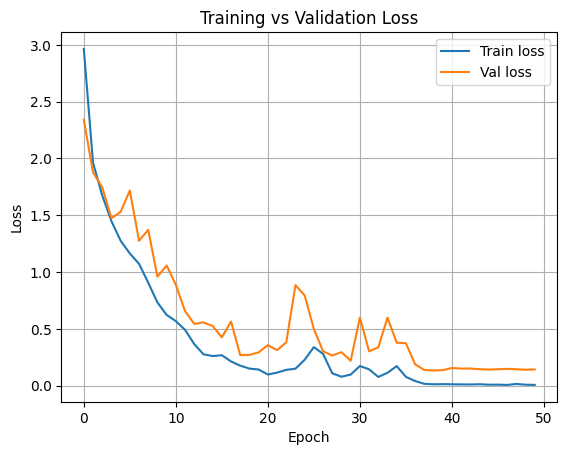

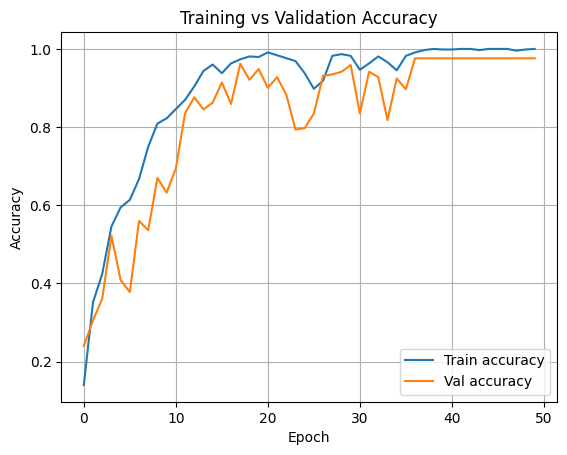

In [38]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#Ερώτηση 7

#Convolutional Neural Network


#Training CNN


In [44]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='CNN')
cnn.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,298 (13.18 MB)

 Trainable params: 3,456,298 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.1022 - loss: 2.6331 - val_accuracy: 0.3333 - val_loss: 2.2390
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.3591 - loss: 2.0914 - val_accuracy: 0.5601 - val_loss: 1.6272
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.6498 - loss: 1.2759 - val_accuracy: 0.7973 - val_loss: 0.8726
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.8794 - loss: 0.5336 - val_accuracy: 0.9313 - val_loss: 0.3063
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.9565 - loss: 0.1846 - val_accuracy: 0.9553 - val_loss: 0.2004
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.9819 - loss: 0.0977 - val_accuracy: 0.9759 - val_loss: 0.1587
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.9884 - loss: 0.0575 - val_accuracy: 0.9759 - val_loss: 0.1152
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.9989 - loss: 0.0183 - val_accuracy: 0.

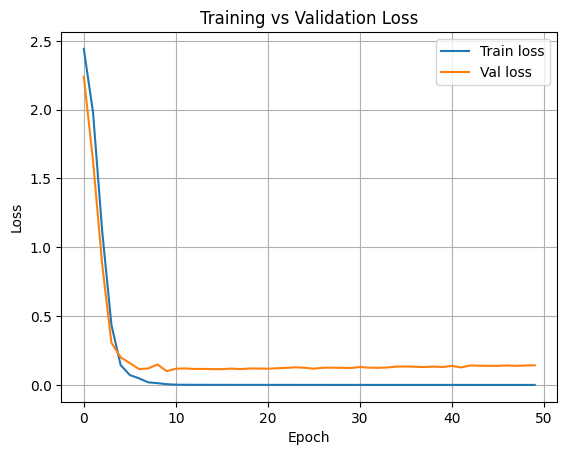

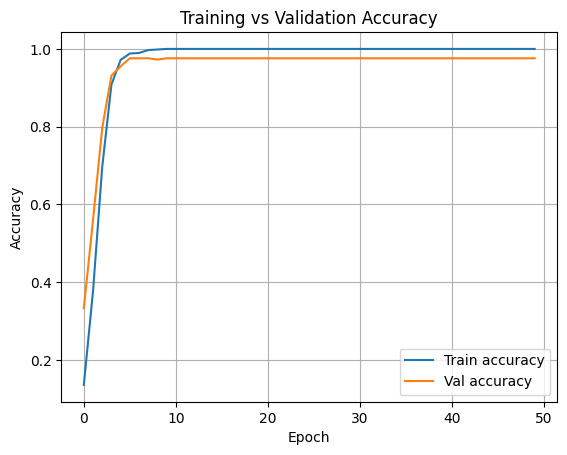

In [46]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Σχόλιο: Παρατηρούμε ότι το CNN επιτυγχάνει ελαφρώς καλύτερη απόδοση από το MLP, με μικρότερη τιμή loss στο validation set.
Αυτό οφείλεται στο ότι το CNN διατηρεί τις χωρικές σχέσεις των pixels και χρησιμοποιεί pooling layers που μειώνουν τις διαστάσεις των feature maps.
Έτσι, μειώνεται ο αριθμός των παραμέτρων και βελτιώνεται η γενίκευση του μοντέλου σε νέα δεδομένα.


#Ερώτηση 8

Σχόλιο: Στο προηγούμενο ερώτημα απο το plot που δημιουργήσαμε ανάμεσα στις Loss functions για το train και validation set πατηρούμε ότι υπάρχει ένδειξη για overfitting.Έτσι θα εφαρμόσουμε Batch Normalization προκειμένου να βελτιώσουμε την απόδοση του μοντέλου.

In [55]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense

In [52]:
cnn_bn = tf.keras.Sequential([
    Input(shape=input_size),

    Conv2D(filters=32, kernel_size=3, strides=2, use_bias=False),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dropout(rate=0.3),

    Conv2D(filters=32, kernel_size=3, strides=1, use_bias=False),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=output_size, activation='softmax')
], name='CNN_BN')

cnn_bn.summary()

Model: "CNN_BN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 31, 31, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 29, 29, 32)     │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,490 (13.19 MB)

 Trainable params: 3,456,362 (13.18 MB)

 Non-trainable params: 128 (512.00 B)

In [53]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn_bn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history_bn = cnn_bn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accuracy: 0.1476 - loss: 8.6980 - val_accuracy: 0.2096 - val_loss: 2.2429
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.5110 - loss: 1.4333 - val_accuracy: 0.2165 - val_loss: 2.2049
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.8756 - loss: 0.6380 - val_accuracy: 0.1065 - val_loss: 2.1853
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9779 - loss: 0.2418 - val_accuracy: 0.1203 - val_loss: 2.0754
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 1.0000 - loss: 0.0963 - val_accuracy: 0.1340 - val_loss: 2.0415
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 1.0000 - loss: 0.0512 - val_accuracy: 0.2027 - val_loss: 1.9974
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 1.0000 - loss: 0.0350 - val_accuracy: 0.2852 - val_loss: 1.9178
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 1.0000 - loss: 0.0222 - val_accuracy: 0.

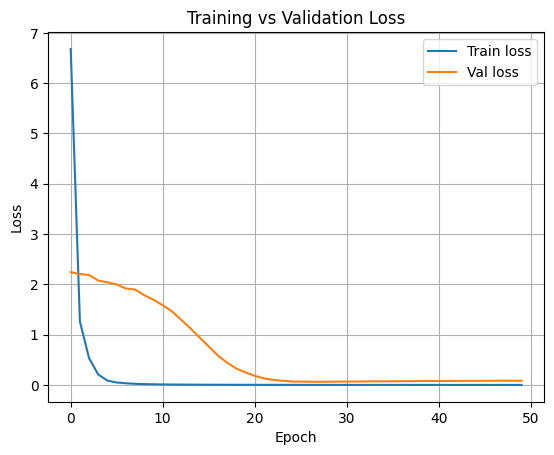

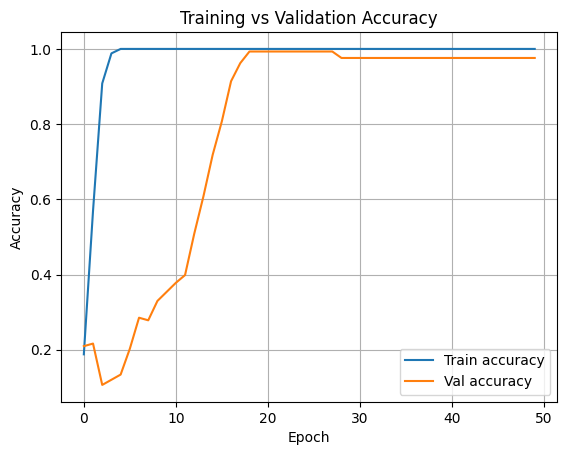

In [54]:
plt.figure()
plt.plot(history_bn.history['loss'], label='Train loss')
plt.plot(history_bn.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history_bn.history['accuracy'], label='Train accuracy')
plt.plot(history_bn.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)